# Player analysis FIFA 19

#### Background
This is my first Data Visualization and Data Analysis project. The project is centered around the stats for the players in the popular video game FIFA 19. The data is provided from Kaggle from the following link: https://www.kaggle.com/karangadiya/fifa19

#### Content
In the analysis of the players we look at some basic statistics regarding age distribution, relation between some key player stats and a comparision of the top 6 Premier League teams (Liverpool, Manchester City, Manchester United, Tottenham, Arsenal and Chelsea).

In [1]:
# First we are going to import the necessary packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the data
df = pd.read_csv("C:/Users/Christian/OneDrive/fifa19_analysis/data.csv")

## 1. Standard data manipulation

In [3]:
#See if data is loaded correctly
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### 1.1 Basic stats about our dataset

In [4]:
df.shape

(18207, 89)

In [5]:
#Show the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#### 1.2 Check the columns in the dataset and pick the columns we will work with:

In [6]:
#Check name of columns in the dataset
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Select the columns we will work with
chosen_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Club',
    'Special',
    'Preferred Foot',
    'International Reputation',
    'Weak Foot',
    'Skill Moves',
    'Work Rate',
    'Position',
    'Height',
    'Weight',
    'Crossing',
    'Finishing', 
    'HeadingAccuracy', 
    'ShortPassing', 
    'Volleys', 
    'Dribbling',
    'Curve', 
    'FKAccuracy', 
    'LongPassing', 
    'BallControl', 
    'Acceleration',
    'SprintSpeed', 
    'Agility', 
    'Reactions', 
    'Balance', 
    'ShotPower',
    'Jumping', 
    'Stamina', 
    'Strength', 
    'LongShots', 
    'Aggression',
    'Interceptions', 
    'Positioning', 
    'Vision', 
    'Penalties', 
    'Composure',
    'Marking', 
    'StandingTackle', 
    'SlidingTackle', 
    'GKDiving', 
    'GKHandling',
    'GKKicking', 
    'GKPositioning', 
    'GKReflexes']

In [8]:
#Creating a DataFrame for the chosen columns
df_fifa = pd.DataFrame(df, columns = chosen_columns)

#### 1.3 Check NaN values and replace them:

In [9]:
df_fifa.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reactions                    48
Balance                      48
ShotPower                    48
Jumping 

In [10]:
#Replace the NaN values in column (Position, International Reputation, Preferred Foot, Club, Weak Foot, Skill Moves)

df_fifa["Club"] = df_fifa["Club"].fillna("Free Transfer")
df_fifa["Preferred Foot"] = df_fifa["Preferred Foot"].fillna("Unknown")
df_fifa["International Reputation"] = df_fifa["International Reputation"].fillna(0)
df_fifa["Weak Foot"] = df_fifa["Weak Foot"].fillna("0")
df_fifa["Skill Moves"] = df_fifa["Skill Moves"].fillna(0)
df_fifa["Work Rate"] = df_fifa["Work Rate"].fillna("Unknown")
df_fifa["Position"] = df_fifa["Position"].fillna("Unknown")
df_fifa["Height"] = df_fifa["Height"].fillna(0)
df_fifa["Weight"] = df_fifa["Weight"].fillna(0)

df_fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Special                      0
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Height                       0
Weight                       0
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina 

## 2. Data visualization and player analysis

#### 2.1 Basic stats

In [11]:
#Show 5 best players
top5_Overall = df_fifa.sort_values("Overall", ascending=False)[["Name", "Overall", "Age", "Nationality", "Club"]].head(5)
top5_Overall.set_index("Name", inplace=True)
print(top5_Overall)

                   Overall  Age Nationality                 Club
Name                                                            
L. Messi                94   31   Argentina         FC Barcelona
Cristiano Ronaldo       94   33    Portugal             Juventus
Neymar Jr               92   26      Brazil  Paris Saint-Germain
De Gea                  91   27       Spain    Manchester United
K. De Bruyne            91   27     Belgium      Manchester City


Above we have 5 highest overall rated players in FIFA 19

#### 2.2 Overall rating distribution

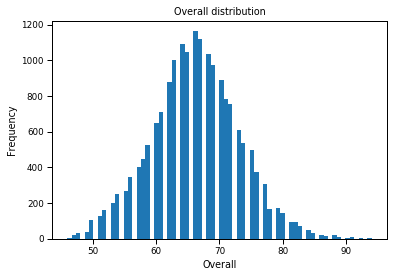

In [50]:
x = np.array(df_fifa.Overall)
plt.hist(x, bins = 70)
plt.title("Overall distribution")
plt.xlabel("Overall")
plt.ylabel("Frequency")
plt.show()

### 2.2 Players age:

#### 2.2.1 How many players of each age?

In [12]:
#How many players of each age
df_fifa.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [42]:
#Create a Numpy array so we can use it in our histogram
x = np.array(df_fifa.Age)

#### 2.2.2 Age distribution histogram

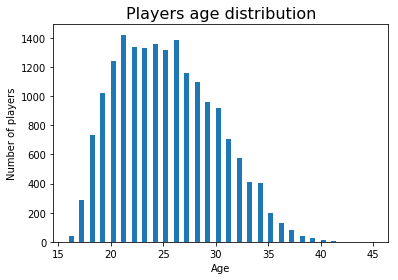

In [14]:
#Now we will make a histogram over many players at each age
plt.hist(x, bins = 58)
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Players age distribution", fontsize=16)
plt.show()

As we can see most players are in range from 21-26, which is a little lower than expected. The best footballing age is from 25-28, so distribution is a little lower than I expected.

#### 2.2.3 Top 10 oldest players

In [15]:
#Oldest players
oldest_players = df_fifa.sort_values("Age", ascending=False)[["Name", "Nationality", "Club", "Position", "Age"]].head(10)
oldest_players.set_index("Name", inplace=True)
print(oldest_players)

                     Nationality                          Club Position  Age
Name                                                                        
O. Pérez                  Mexico                       Pachuca       GK   45
K. Pilkington            England              Cambridge United       GK   44
T. Warner      Trinidad & Tobago            Accrington Stanley       GK   44
S. Narazaki                Japan                Nagoya Grampus       GK   42
C. Muñoz               Argentina  CD Universidad de Concepción       GK   41
J. Villar               Paraguay                 Free Transfer       GK   41
H. Sulaimani        Saudi Arabia                     Ohod Club       LB   41
M. Tyler                 England           Peterborough United       GK   41
B. Nivet                  France                  ESTAC Troyes      CAM   41
F. Kippe                  Norway                 Lillestrøm SK      LCB   40


#### 2.2.4 Top 10 youngest players

In [16]:
#Youngest players
youngest_players = df_fifa.sort_values("Age")[["Name", "Nationality", "Club", "Position", "Age"]].head(10)
youngest_players.set_index("Name", inplace=True)
print(youngest_players)

                        Nationality             Club Position  Age
Name                                                              
G. Nugent                   England  Tranmere Rovers       CM   16
J. Olstad                    Norway  Sarpsborg 08 FF       ST   16
H. Massengo                  France        AS Monaco      CDM   16
J. Italiano               Australia      Perth Glory       LM   16
N. Ayéva                     Sweden        Örebro SK       ST   16
K. Broda                     Poland     Wisła Kraków       GK   16
L. D'Arrigo               Australia  Adelaide United      CAM   16
Y. Verschaeren              Belgium   RSC Anderlecht      CAM   16
B. Nygren                    Sweden     IFK Göteborg       ST   16
B. O'Gorman     Republic of Ireland   Bray Wanderers       RM   16


#### 2.2.5 Age distribution in different countries

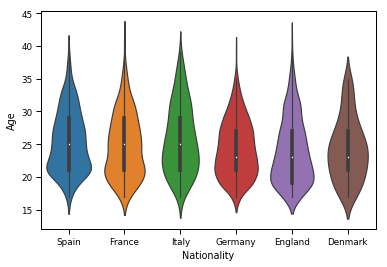

In [38]:
selected_nations = ("Spain", "England", "France", "Italy", "Germany", "Denmark")
# Then we assign the value from the data set
nations_age = df_fifa[df_fifa["Nationality"].isin(selected_nations) & df_fifa["Age"]]

#Then we make a violin plot
sns.violinplot(x="Nationality", y="Age", data=nations_age)
sns.set_context("paper")

### 2.3 Top 6 Premier League Teams

#### 2.3.1 Age distribution

C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


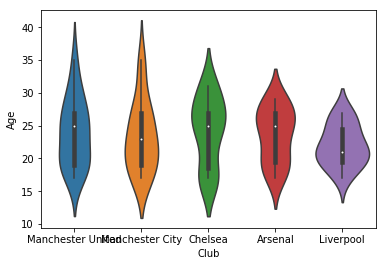

In [17]:
# Players age distribution in top 6 Premier League teams
# First we make a varibel string with name of the clubs
selected_clubs = ("Liverpool", "Manchester City", "Chelsea", "Manchester United", "Tottenham", "Arsenal")
# Then we assign the value from the data set
top6_clubs_age = df_fifa[df_fifa["Club"].isin(selected_clubs) & df_fifa["Age"]]

#Then we make a violin plot
sns.violinplot(x="Club", y="Age", data=top6_clubs_age)
sns.set_context("paper")

Liverpool have the most young players, in the range from 18-24, and Chelsea is by far the club with least youngest players.

Manchester City and Manchester United look very simuarly with a very well distributed age range and Arsenal have most players in their "best footballing age" compared to the other top 6 clubs.

#### 2.3.2 Compare aggression

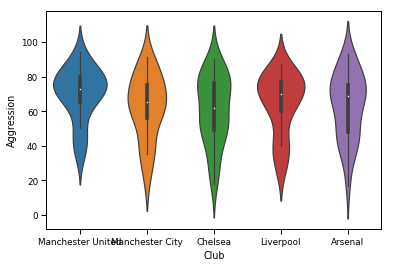

In [18]:
# Then we assign the value from the data set
top6_clubs_aggression = df_fifa[df_fifa["Club"].isin(selected_clubs) & df_fifa["Aggression"]]
top6_clubs_aggression.mean()

#Then we make a violin plot
sns.violinplot(x="Club", y="Aggression", data=top6_clubs_aggression)
sns.set_context("paper")

Manchester United and Liverpool are the two teams with the highest aggression. Liverpool isn't a suprise following their high pressure football, but Man. United is a bit more of a surprise with players in the high aggrresion area.

Chelsea is the team with the lowest aggression which can be coupled with their general age. This also follows the tracks that Liverpool, the youngest team, is the team with the highest aggression. 

#### 2.3.3 Potential across Top 6 teams

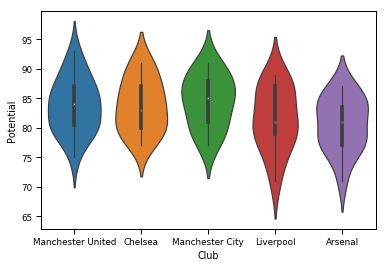

In [19]:
# Then we assign the value from the data set
top6_clubs_potential = df_fifa[df_fifa["Club"].isin(selected_clubs) & df_fifa["Potential"]]

#Then we make a violin plot
sns.violinplot(x="Club", y="Potential", data=top6_clubs_potential)
sns.set_context("paper")

One interesting point is that Man. United and Man. City, with very simuarly age plot, have a almost reverse plot regarding their potential. City's players are more a team which is moving forward where United players is more on a downward slope.

Liverpool have a much lower potential than expected when considered their low age and generally good form in real life, but this suggest that their squad doesn't have much depth. 

Not to much of a surprise Arsenal is the team with the lowest potential, which which follows the track of their old squad. 

### 2.4 Most overall ingame stats

#### 2.4.1 Top 10 Overall ingame stats

In [27]:
# Here we have the players with the most overall ingame stats
special_most = df_fifa.sort_values("Special", ascending=False)[["Name", "Nationality", "Club", "Position", "Special"]].head(10)
special_most.set_index("Name", inplace=True)
print(special_most)

              Nationality               Club Position  Special
Name                                                          
L. Suárez         Uruguay       FC Barcelona       RS     2346
K. De Bruyne      Belgium    Manchester City      RCM     2281
L. Modrić         Croatia        Real Madrid      RCM     2280
G. Bale             Wales        Real Madrid       ST     2279
Marcelo            Brazil        Real Madrid       LB     2279
R. Nainggolan     Belgium              Inter      CAM     2278
M. Acuña        Argentina        Sporting CP       LB     2265
D. Alaba          Austria  FC Bayern München       LB     2261
Alex Telles        Brazil           FC Porto       LB     2259
A. Florenzi         Italy               Roma       RB     2253


#### 2.4.2 Most overall ingame stats per position

In [41]:
# Most overall stats per position
special_position = df_fifa.sort_values("Special", ascending=False)[["Name", "Nationality", "Club", "Position", "Special"]].drop_duplicates(["Position"])
special_position.set_index("Name", inplace=True)
print(special_position)

                Nationality                            Club Position  Special
Name                                                                         
L. Suárez           Uruguay                    FC Barcelona       RS     2346
K. De Bruyne        Belgium                 Manchester City      RCM     2281
G. Bale               Wales                     Real Madrid       ST     2279
Marcelo              Brazil                     Real Madrid       LB     2279
R. Nainggolan       Belgium                           Inter      CAM     2278
A. Florenzi           Italy                            Roma       RB     2253
P. Pogba             France               Manchester United      RDM     2247
Paulinho             Brazil  Guangzhou Evergrande Taobao FC      LDM     2245
Bruno Fernandes    Portugal                     Sporting CP      LCM     2223
G. Bonaventura        Italy                           Milan       CM     2207
L. Messi          Argentina                    FC Barcelona     

### 2.5 Correlation between different stats

#### 2.5.1 Sprint Speed correlation to: Dribbling, Acceleration, Balance and Agility

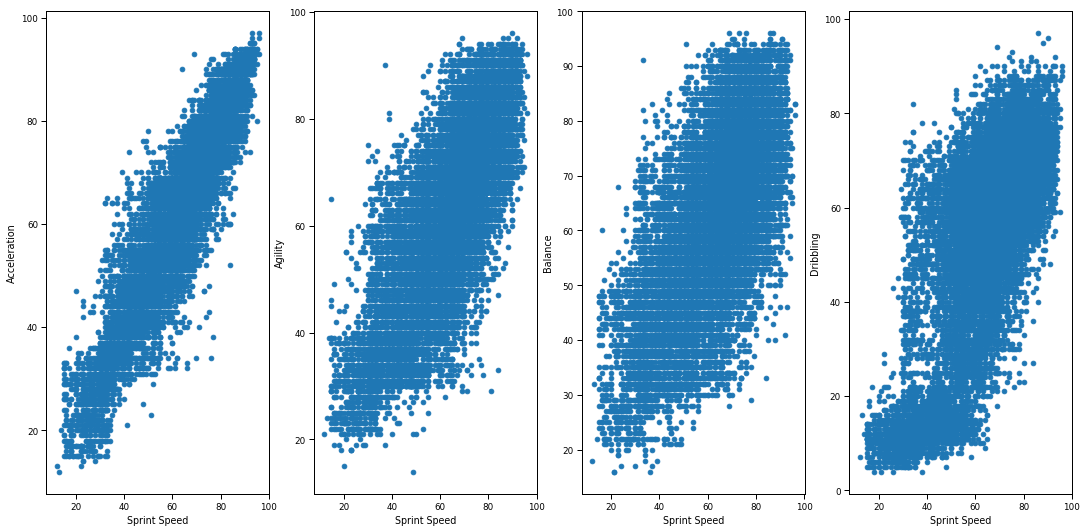

In [21]:
#Now we will show the correlation between different age and stamina, international reputation, sprint speed, acceleration, compusure
#Do it through a scatter plot

x_SprintSpeed = df_fifa["SprintSpeed"]
y_acceleration = df_fifa["Acceleration"]
y_agility = df_fifa["Agility"]
y_balance = df_fifa["Balance"]
y_dribbling = df_fifa["Dribbling"]


f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
ax1.scatter(x_SprintSpeed, y_acceleration, s=23)
ax1.set_xlabel("Sprint Speed")
ax1.set_ylabel("Acceleration")

ax2.scatter(x_SprintSpeed, y_agility, s=23)
ax2.set_xlabel("Sprint Speed")
ax2.set_ylabel("Agility")

ax3.scatter(x_SprintSpeed, y_balance, s=23)
ax3.set_xlabel("Sprint Speed")
ax3.set_ylabel("Balance")

ax4.scatter(x_SprintSpeed, y_dribbling, s=23)
ax4.set_xlabel("Sprint Speed")
ax4.set_ylabel("Dribbling")

plt.subplots_adjust(top=1.8, right=2.5)

plt.show()

As we can there is a big correlation between sprint speed and selected attributes.
Specially sprint speed and acceleration have a big connection, which isn't much of a surprise. There is also a correlation between sprint speed and dribling, but the fastest have dribling more in the 60-80 area, which can be explained by two parameters:
1. The fast players often aren't the most technical players. It's pretty coomon for fast players to have speed as their main strenght and aren't so technical, which drives the correlation down. 
2. Some more technical players, no. 10 role and central midfielders in general, doesn't have much pace either which drives the correlation down.

#### 2.5.2 Finishing correlation to: Composure, Positioning, Shot Power and Long Shots

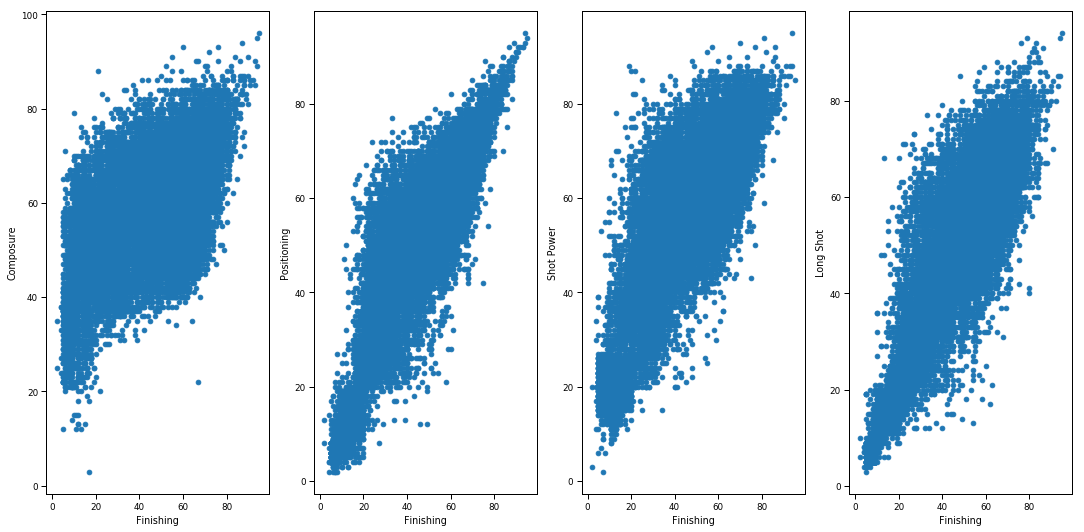

In [35]:
# We want to see the correlation between finishing and som ekey stat which we asume have a correlation to the finishing
x_finishing = df_fifa["Finishing"]
y_composure = df_fifa["Composure"]
y_positioning = df_fifa["Positioning"]
y_shotpower = df_fifa["ShotPower"]
y_longshot = df_fifa["LongShots"]

f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
ax1.scatter(x_finishing, y_composure, s=23)
ax1.set_xlabel("Finishing")
ax1.set_ylabel("Composure")

ax2.scatter(x_finishing, y_positioning, s=23)
ax2.set_xlabel("Finishing")
ax2.set_ylabel("Positioning")

ax3.scatter(x_finishing, y_shotpower, s=23)
ax3.set_xlabel("Finishing")
ax3.set_ylabel("Shot Power")

ax4.scatter(x_finishing, y_longshot, s=23)
ax4.set_xlabel("Finishing")
ax4.set_ylabel("Long Shot")

plt.subplots_adjust(top=1.8, right=2.5)

plt.show()

We can see that there is a linear correlation between finishing and our chosen key stats: Composure, Positioning, Shot Power and Long Shots.

Cmoposure is the stat with the correlation to finishing.It's due to the fact that both some defender and midfielders have high composure and they naturally don't have high finishing. This means that composure isn't only have calm you are infront of goal but also correlates some thing different. Players with high finishing do often have high composure.

Specially the correlation between Finishing and Positiong is very strong. The is very expected, as attackers who are good at getting in good positions, generally know how to finish the ball. Positioning is often an innate skill which strikers like Lewandowski, Thomas Mûller, Chicharito have mastered, as it's a innate finishing is then a skill these players have practised upon realizing their great positioning skill.

The correlation between Finishing and Long Shots is strong too, which is somewhat a little surprise since these to skills, undoubtfully is correlated, but still are to very different skills. You don't normally associate players like Lewandowski, Chicharito, Cavani, Aguero etc., with a good long shot, but the correlation is probally the way around. Where players like Ronaldo, Suarez, De Bruyne, Coutinho, James Rodriguez etc.